# 실습 - 외국인 출입국 통계구하기

### 데이터 전처리

In [1]:
import pandas as pd 
kto_201901 = pd.read_excel('./files/kto_201901.xlsx', 
                          header=1,
                          usecols='A:G',
                          skipfooter=4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [2]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [3]:
kto_201901.info() # 데이터의 칼럼별 특징

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
kto_201901.describe() # 전반적인 수치의 정보 확인

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [5]:
condition = (kto_201901['관광'] == 0) \
                | (kto_201901['상용'] == 0) \
                | (kto_201901['공용'] == 0) \
                | (kto_201901['유학/연수'] == 0) # 최소값(min)이 0인 데이터의 경우 확인 
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [6]:
# 기준년월 컬럼 생성하기 
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [7]:
# 국적데이터 남기기/중복제거 한 값을 보여줌
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [8]:
# 대륙목록 만들기 
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [9]:
# kto_201901 데이터의 국적 칼럼에서 continents_list 에 포함되지 않는 국가만 선택
condition = (kto_201901.국적.isin(continents_list) == False) 
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [10]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [11]:
# 인덱스 재설정 – 데이터 필터링 시 인덱스 누락이 발생하기 때문에 초기화 해주는 것이 좋다.
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True) 
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [12]:
# 각 국가들이 어떤 대륙에 속하는지에 대한 정보를 추가하기 위해   대륙칼럼 추가 전 국가별 매칭되는 대륙 확인. 대륙 칼럼에 넣을 리스트 생성.
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 \
+ ['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [13]:
# 대륙 칼럼 생성
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [14]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [15]:
# 관광객비율 칼럼생성
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [16]:
# 관광객칼럼비율 칼럼으로 내림차순 정렬
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
23,GCC,1550,37,14,72,103,1776,2019-01,아시아,87.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
34,스웨덴,844,29,6,18,85,982,2019-01,유럽,85.9


In [17]:
# 관광객칼럼비율 칼럼으로 오름차순 정렬
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [18]:
# 대륙별 관광객 비율의 평균
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',
                                       index = '대륙',
                                       aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [19]:
# 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율
# 2019년 1월 우리나라 방문하는 전체 외국인 관광객 숫자 구하기 
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum 

884293

In [20]:
#전체비율(%) 컬럼 생성
kto_201901_country_newindex['전체비율(%)'] = \
round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [21]:
# 전체비율(%) 컬럼 기준으로 내림차순 정렬하기 
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [29]:
def create_kto_data(yy, mm):  
    # 불러올 Excel 파일 경로를 지정해주기
    file_path = '../mypythoncode/files/kto_{}{}.xlsx'.format(yy, mm)     
    # Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')    
    # "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm)     
    # "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True)  
    # 대륙 컬럼 생성을 위한 목록 만들어 놓기
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    # "대륙" 컬럼 추가하기 
    df_country['대륙'] = continents                          
    # 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)                        
    # "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)    
    # 결과 출력하기 
    return(df_country)

In [30]:
# 2018년 12월 데이터 불러오기
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [32]:
# 2018년 12월 데이터 불러오기
kto_test = create_kto_data(2018, 3)
kto_test.head()

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-32-349cb57ffae2>, line 2)

In [33]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2) # zfill함수를 이용, 0을 포함한 두 자리로 출력
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [34]:
# 통합 데이터 생성하기 
df = pd.DataFrame()

# 패턴 분석결과를 이중 반복문을 통해 구현 
for yy in range(2010, 2021):
    for mm in range(1, 13):
        # try 이하 구문을 실행 
        try:
            # 앞서 만든 create_kto_data 함수로 Excel 데이터를 temp 에 불러오기 
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            # temp 로 불러온 데이터를 df 밑으로 추가하기 
            df = df.append(temp, ignore_index=True)
        # 만약 try 구문에서 에러가 발생하면 except 이후를 실행 
        except:
            pass

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7920 non-null   object 
 1   관광        7920 non-null   int64  
 2   상용        7920 non-null   int64  
 3   공용        7920 non-null   int64  
 4   유학/연수     7920 non-null   int64  
 5   기타        7920 non-null   int64  
 6   계         7920 non-null   int64  
 7   기준년월      7920 non-null   object 
 8   대륙        7920 non-null   object 
 9   관광객비율(%)  7919 non-null   float64
 10  전체비율(%)   7920 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 680.8+ KB


In [36]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [37]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7915,대양주 기타,2,0,0,0,30,32,2020-12,대양주,6.2,0.0
7916,남아프리카공화국,14,4,3,0,77,98,2020-12,아프리카,14.3,0.1
7917,아프리카 기타,22,102,13,27,554,718,2020-12,아프리카,3.1,0.2
7918,국적미상,0,0,0,0,0,0,2020-12,기타대륙,NaN,0.0
7919,교포,0,0,0,0,915,915,2020-12,교포,0.0,0.0


In [38]:
df.to_excel('./files/kto_total.xlsx', index = False)

### 시각화

In [39]:
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')


In [40]:
import matplotlib.pyplot as plt

In [41]:
# 중국 국적 데이터 필터링하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


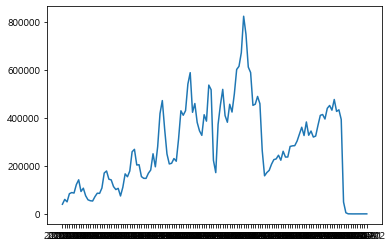

In [42]:
# 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

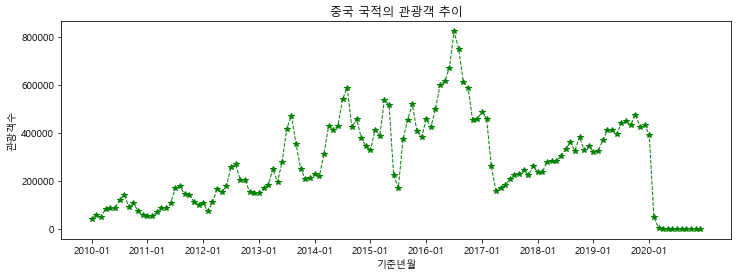

In [43]:
# 그래프 크기 조절 
plt.figure(figsize = (12, 4))
# 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'], 'g--*', lw=1)
# 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
# x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
# 그래프 표현하기 
plt.show()

In [44]:
# 우리나라 방문하는 외국인 관광객 중 상위 5개 국가 리스트 생성
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

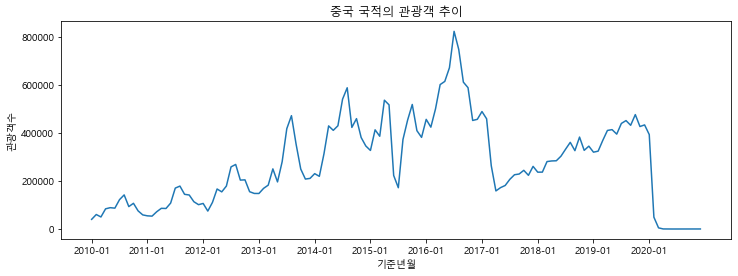

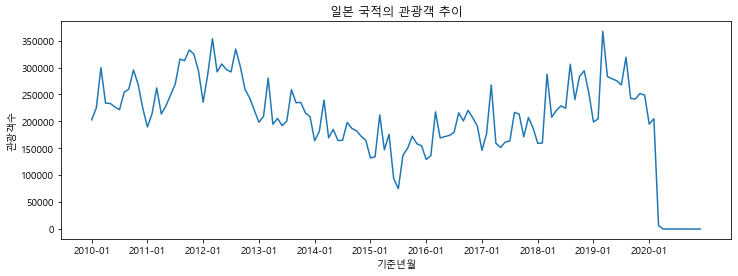

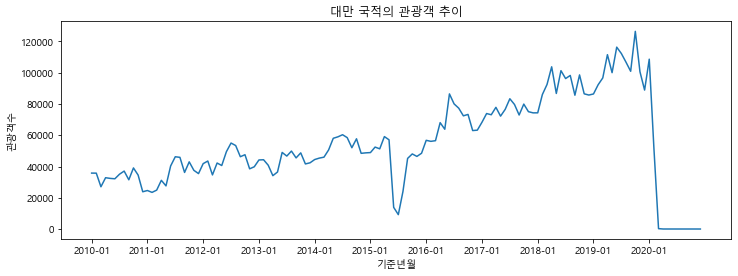

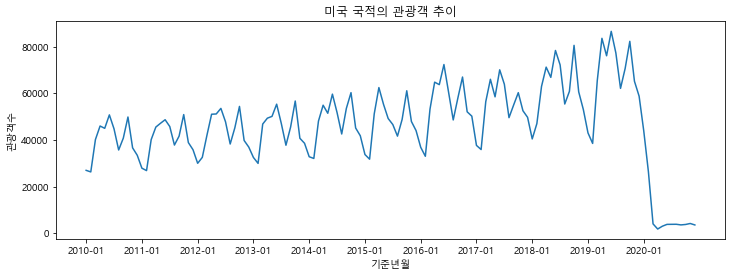

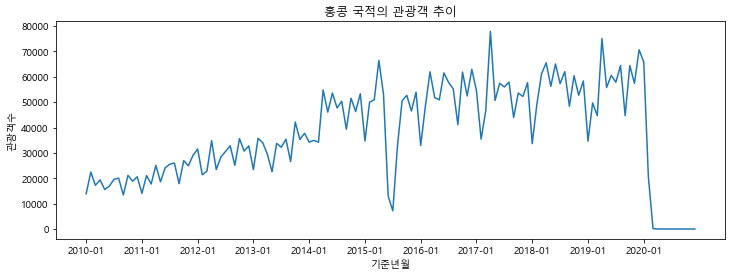

In [45]:
for cntry in cntry_list: 
    # 국적 같은 정보 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]    
    # 그래프 크기 조절 
    plt.figure(figsize = (12, 4))    
    # 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    # 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    # x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    # 그래프 표현하기 
    plt.show()

In [46]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [47]:
condition = (df['국적'] == '중국')	# 중국인 관광객 필터링
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [48]:
# df_filter 데이터를 매트릭스 형태로 변환
df_pivot = df_filter.pivot_table(values = '관광' # 내부 표현값
                         , index = '년도' # Y축
                         , columns = '월') # X축
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425,60590,50330,84252,89056,87080,122432,142180,93545,107237,75686,58987
2011,55070,53863,72003,86397,85668,108060,170524,178937,144704,141824,113856,101605
2012,106606,74895,110965,166843,154841,179074,258907,268988,203857,204866,155503,148320
2013,148118,169395,182850,250549,196306,280319,417991,472005,353359,249850,208175,210950
2014,230706,219533,313400,429419,410971,429991,540683,588181,423133,459708,381118,345957
2015,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,409635,381722
2016,456636,424232,500018,601460,614636,671493,823016,747818,611538,588561,452082,456882
2017,489256,458952,263788,158784,172527,181507,207099,226153,229172,244541,223743,260983
2018,236825,237075,281020,283533,284317,303405,332657,360982,326438,382922,327664,345135


In [49]:
# seaborn 라이브러리 필요. 항상 matplotlib 함께 임포트 해야함.# seaborn 라이브러리는 matplotlib 라이브러리에 종속되기 때문 
import matplotlib.pyplot as plt 
import seaborn as sns 

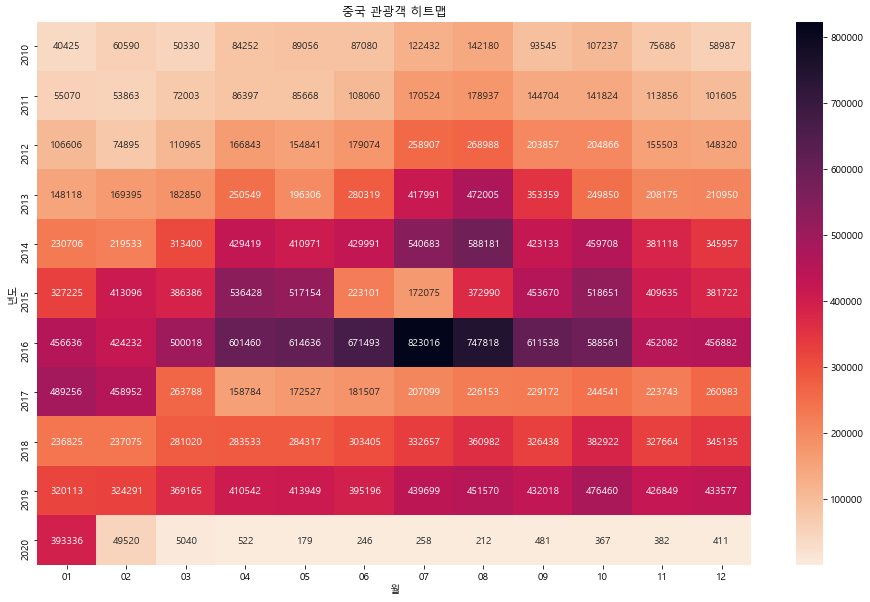

In [50]:
# 그래프 크기 설정 
plt.figure(figsize = (16, 10))
# 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
# 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')
# 그래프 표현 
plt.show()